In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("glass_labelled.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [56]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [4]:
df.shape

(214, 10)

In [11]:
df["Type"]

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [55]:
df["Si"]

0      71.78
1      72.73
2      72.99
3      72.61
4      73.08
       ...  
209    72.61
210    73.06
211    73.42
212    73.61
213    73.36
Name: Si, Length: 214, dtype: float64

In [14]:
df.mean()

RI       1.518365
Na      13.407850
Mg       2.684533
Al       1.444907
Si      72.650935
K        0.497056
Ca       8.956963
Ba       0.175047
Fe       0.057009
Type     2.780374
dtype: float64

In [15]:
df.std()

RI      0.003037
Na      0.816604
Mg      1.442408
Al      0.499270
Si      0.774546
K       0.652192
Ca      1.423153
Ba      0.497219
Fe      0.097439
Type    2.103739
dtype: float64

In [19]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [24]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

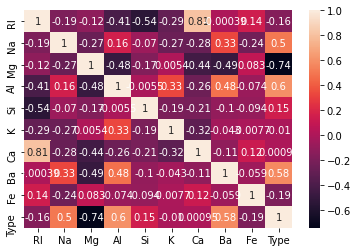

In [38]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:ylabel='Frequency'>

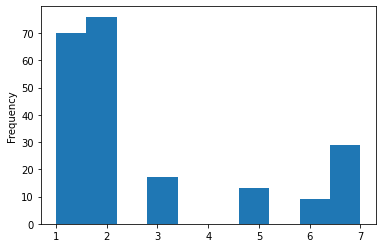

In [34]:
df['Type'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

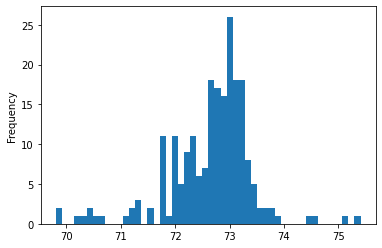

In [37]:
df['Si'].plot.hist(bins = 50)

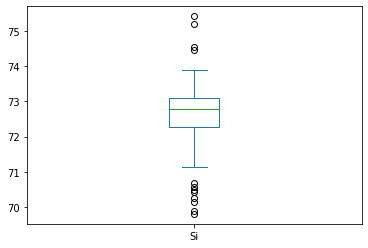

In [23]:
ax = (df['Si']).plot.box()

<AxesSubplot:>

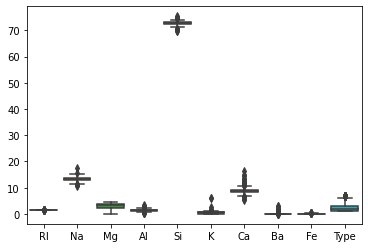

In [39]:
sns.boxplot(data = df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=60);

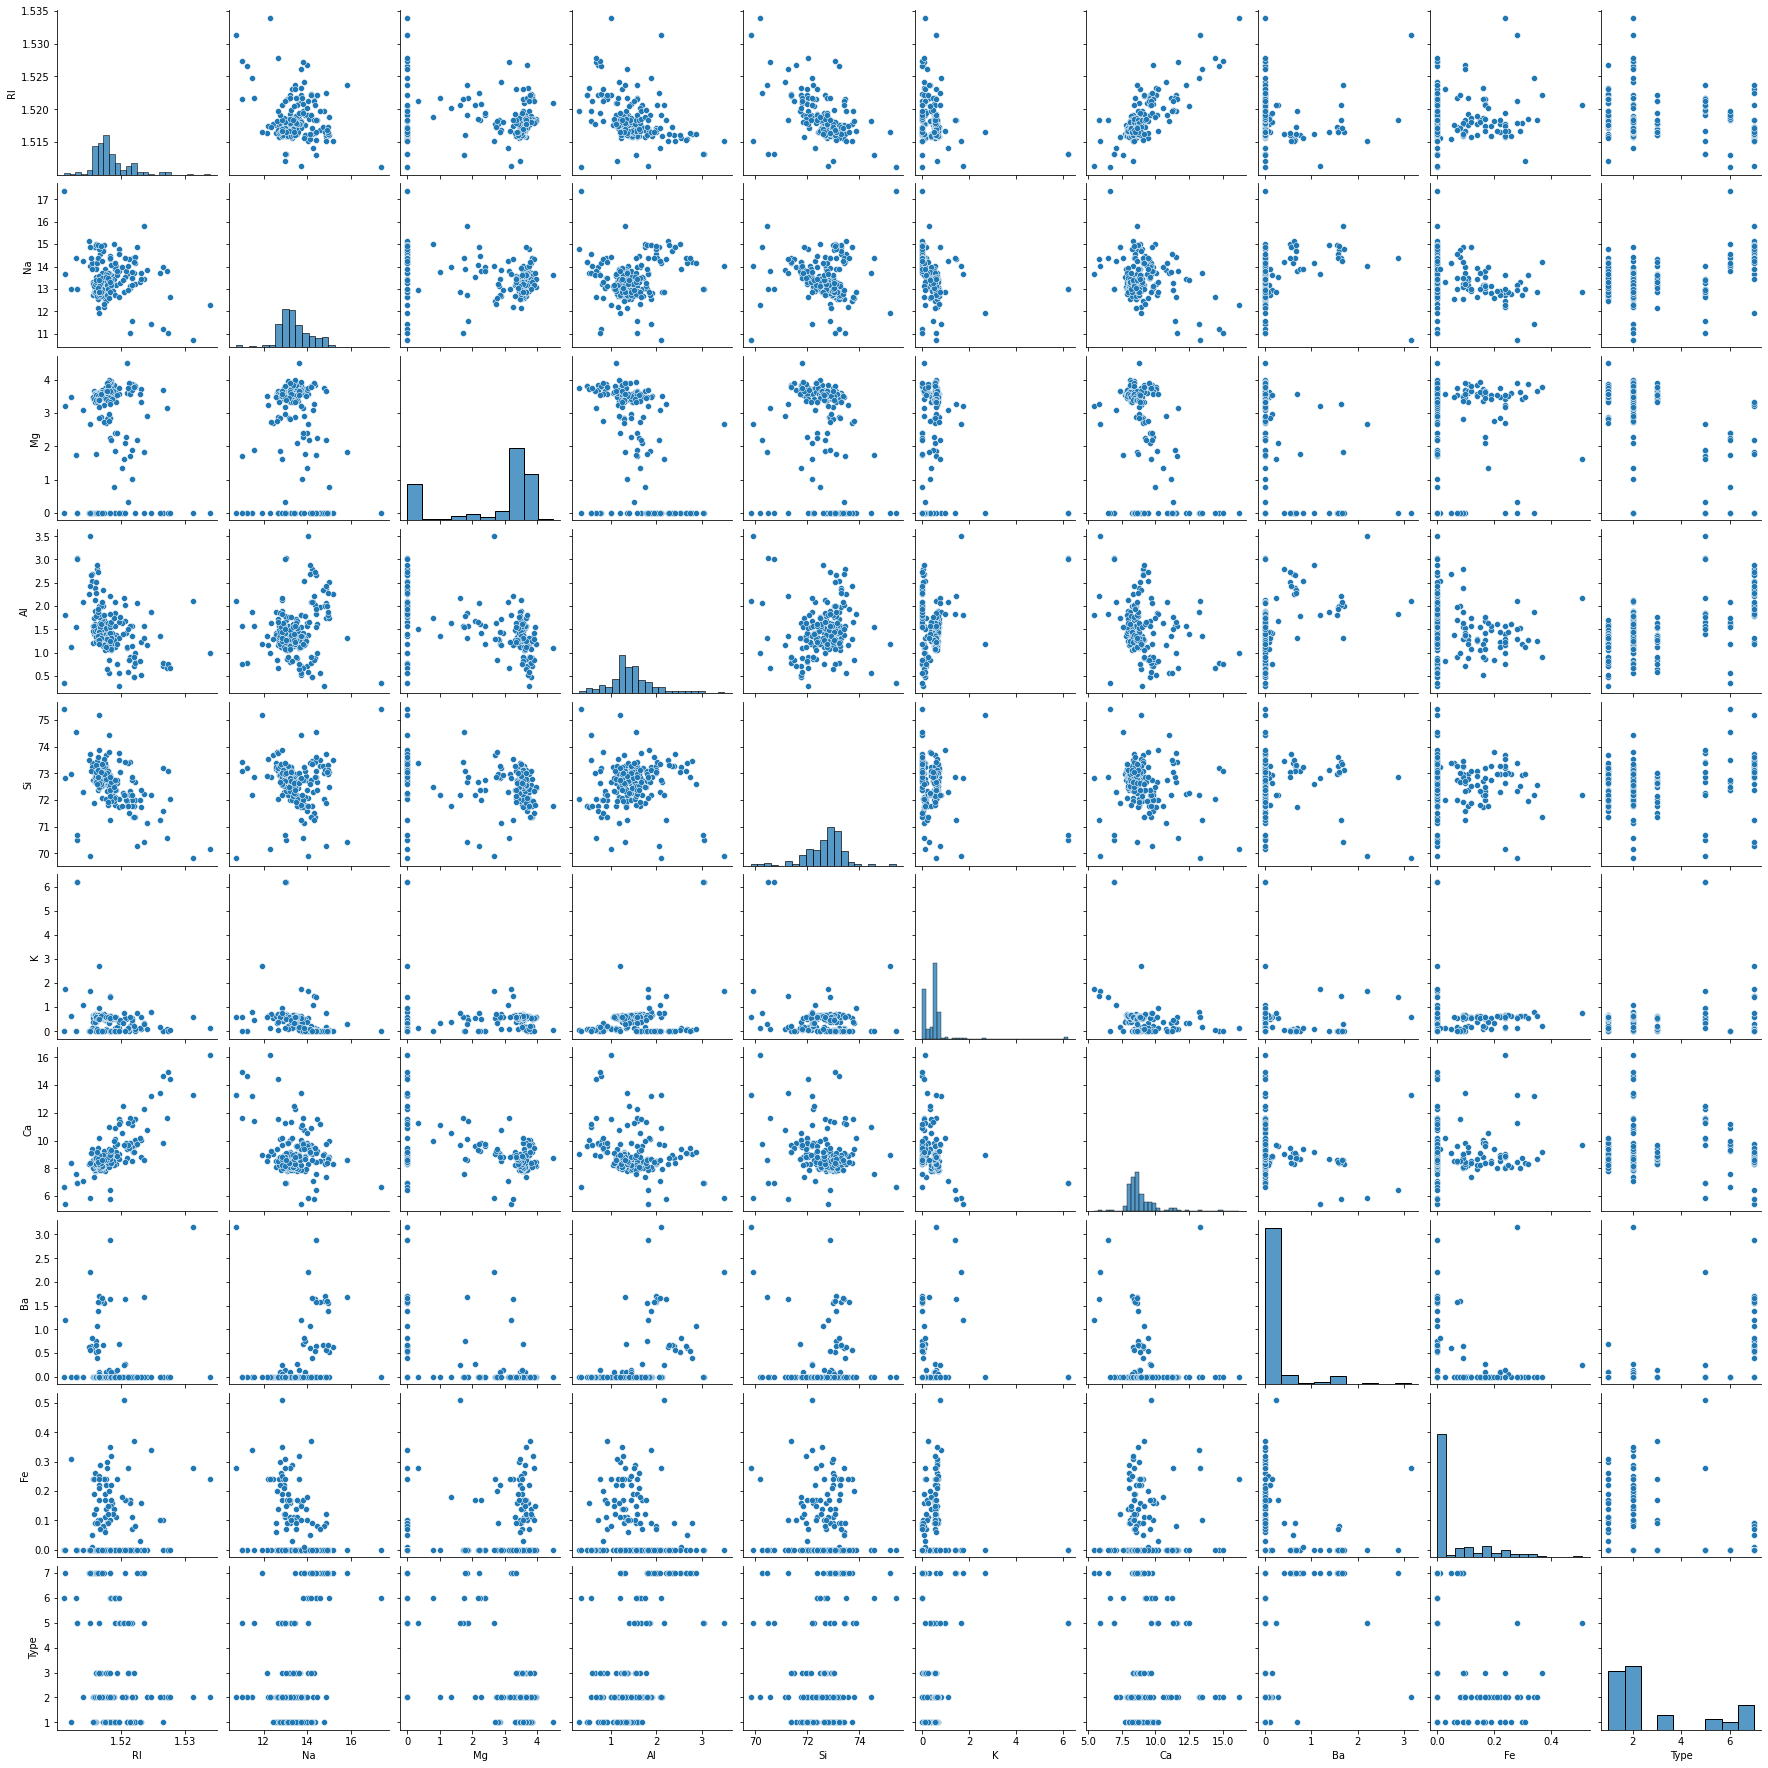

In [54]:
sns.pairplot(data = df)

In [70]:
x = df.drop(["RI","Type"], axis = 1)
y = df["Type"]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [72]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [73]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred))

1.0
0.6833333333333333


In [74]:
print(metrics.confusion_matrix(y_pred, y_test))

[[17  6  4  0  0  0]
 [ 4 14  0  3  1  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  5]]


In [79]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred))

print(metrics.confusion_matrix(y_pred, y_test))

1.0
0.6333333333333333
[[16  8  4  0  0  1]
 [ 5 12  0  2  1  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  4]]


In [80]:
mlp = MLPClassifier(
    hidden_layer_sizes = (20, 20),
    max_iter = 5000
)

mlp.fit(x_train_scaled, y_train)

print(mlp.score(x_train_scaled, y_train))

y_pred_mlp = mlp.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_mlp))

1.0
0.5166666666666667


In [81]:
print(metrics.confusion_matrix(y_pred_mlp, y_test))

[[10  6  2  0  0  1]
 [ 5 13  2  3  1  0]
 [ 6  1  1  1  0  0]
 [ 0  0  0  2  1  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]


In [86]:
# glass

tw = pd.read_csv("glass_choice.csv")

x_tw = tw

x_tw = scaler.transform(x_tw) 

y_pred_tw = rf.predict(x_tw)

print(y_pred_tw)

[2]
